C:\Users\cyu\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cyu\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cyu\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cyu\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and

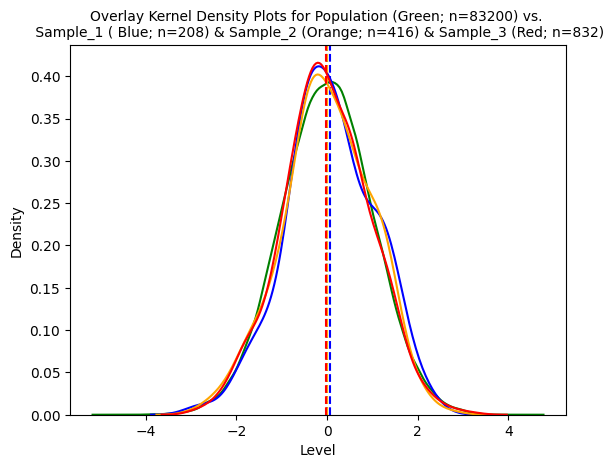

In [1]:
# Import in order to use inbuilt functions
import numpy as np
import pandas as pd
 
# Define total number of samples
total_number = 1600*52
sample_number_1 = round(total_number*0.0025)
sample_number_2 = round(total_number*0.0050)
sample_number_3 = round(total_number*0.0100)
interval_1 = (total_number // sample_number_1)
interval_2 = (total_number // sample_number_2)
interval_3 = (total_number // sample_number_3)
 
# Create data dictionary
data = {'ID': np.arange(1, total_number+1).tolist(),
        'Level': np.random.normal(loc=0, scale=1, size=total_number).tolist()}
 
# Transform dictionary into a data frame
df = pd.DataFrame(data)
 
# Define systematic sampling function
def systematic_sampling(df, interval):
    indexes = np.arange(0, len(df), step=interval)
    sample = df.iloc[indexes]
    return sample
 
# Obtain a systematic sample and save it in a new variable
sample_1 = systematic_sampling(df, interval_1)
sample_2 = systematic_sampling(df, interval_2) 
sample_3 = systematic_sampling(df, interval_3)

# Obtain summary statistics for two samples to compare briefly
df.describe()
sample_1.describe()
sample_2.describe()
sample_3.describe()

import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df, x="Level", color="green").axvline(x=df.Level.mean(), linestyle="dashed", color="green")  
sns.kdeplot(data=sample_1, x="Level", color="blue").axvline(x=sample_1.Level.mean(), linestyle="dashed", color="blue") 
sns.kdeplot(data=sample_2, x="Level", color="orange").axvline(x=sample_2.Level.mean(), linestyle="dashed", color="orange") 
sns.kdeplot(data=sample_3, x="Level", color="red").axvline(x=sample_3.Level.mean(), linestyle="dashed", color="red") 
plt.title('Overlay Kernel Density Plots for Population (Green; n='+str(total_number)+') vs. \n Sample_1 ( Blue; n='+str(sample_number_1)+') & Sample_2 (Orange; n='+str(sample_number_2)+') & Sample_3 (Red; n='+str(sample_number_3)+')', fontsize=10)
#plt.title('Population (Green; n='+str(total_number)+') & Samples (Blue; n='+str(sample_number_1)+' & Orange; n=', +str(sample_number_2)+', & Red; n='+str(sample_number_3)+')', fontsize=10)
plt.show()

df2 = df.sample(frac=1).reset_index(drop=True)
df3 = df.sample(n=int(len(df)/52)).reset_index(drop=True)